In [20]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [21]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Intensity/CSV/Optical_Mag.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-21-efad93c43644>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-21-efad93c43644>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Class
0,372.92203,362.69130,350.63812,210.87730,214.75081,164.38365,212.35160,251.46540,312.61560,205.60248,...,288.037230,410.070100,441.603550,379.87680,1398.7834,278.7160,301.12616,239.117050,477.266100,1
1,240.19547,240.12958,256.62112,252.72621,170.48306,281.75586,174.03131,173.71799,255.81352,238.56960,...,435.283140,518.044900,914.143000,449.55862,2467.9111,4137.2305,3146.77100,2503.685000,910.993200,1
2,1517.87350,1229.62510,1227.23520,1408.06520,1701.61070,1425.35190,1373.96680,1437.91490,1633.49540,1862.82590,...,1676.284000,1532.106100,1503.260300,1570.20980,1742.7628,1926.9270,1565.97330,1381.225200,1356.190700,1
3,2443.07370,3847.75660,10229.55900,3523.68070,6001.05300,8588.63600,15606.87600,9383.27000,9314.14100,4888.85500,...,2.965529,2.965872,2.965872,1.35458,3908.4420,161.7076,52.62399,2.952988,3.275134,1
4,9062.74100,11081.28700,10685.92400,8698.27100,5733.89840,8995.76600,8062.09960,9380.41000,5809.62940,5657.07900,...,52994.870000,59666.290000,20668.380000,10549.26400,3290.1765,5431.4650,9030.68750,10763.368000,9192.955000,1


In [22]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [23]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8035714285714286
              precision    recall  f1-score   support

          -1       0.90      0.87      0.88       142
           1       0.39      0.46      0.42        26

    accuracy                           0.80       168
   macro avg       0.64      0.66      0.65       168
weighted avg       0.82      0.80      0.81       168



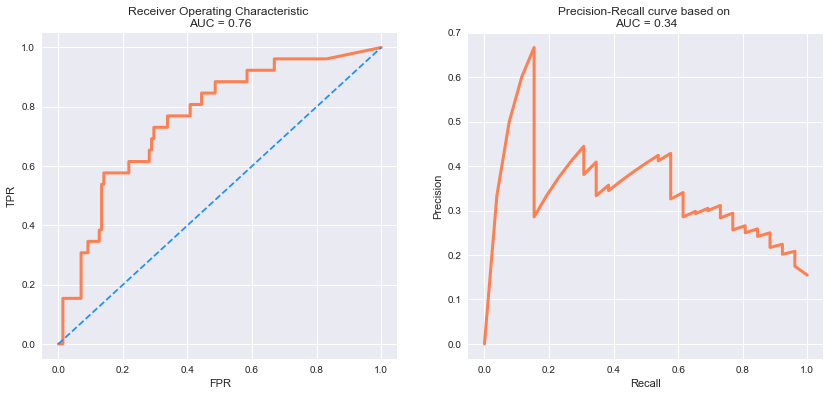

In [24]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()